# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import regex as re
import random
import glob

# Data Preparation

In [2]:
import nltk
#nltk.download('gutenberg')
#nltk.download('punkt')

In [3]:
BooksList = nltk.corpus.gutenberg.fileids()
print(BooksList)

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [4]:
np.random.seed(42)

labeledDocs = []
for index, book in enumerate(random.sample(BooksList,6)):
    # For each book in the list
    text = nltk.corpus.gutenberg.raw(book)
    allSentenses = nltk.sent_tokenize(text)
    allWords = nltk.word_tokenize(text)
    allLabeledsDocs = []
    record = ''
    for sentence in allSentenses:
        record += ' ' + sentence
        if (len(nltk.word_tokenize(record)) >= 100):
            allLabeledsDocs.append([record,chr(65 + index)])
            record = '' # Empty the reocord
    # Check no of records with atleast 100 words in them
    # print(book,len(allLabeledDocs))
    if(len(allLabeledsDocs) > 200):
        labeledDocs += random.sample(allLabeledsDocs,200)

In [5]:
len(labeledDocs)

1200

# Distribution of no of words per record with full sentenses.

<AxesSubplot:xlabel='recordNum', ylabel='wordCount'>

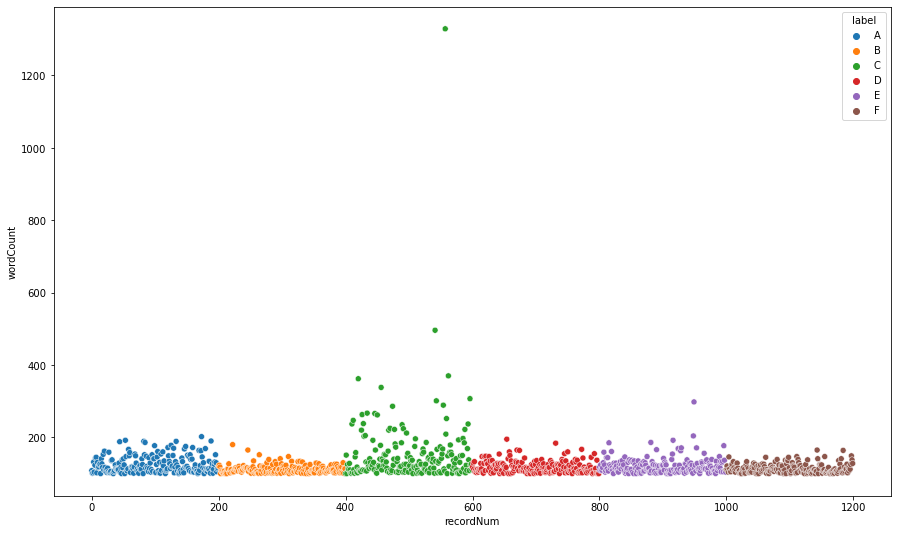

In [6]:
x,y,label =[],[],[]
for index, doc in enumerate(labeledDocs):
    x.append(index)
    y.append(len(nltk.word_tokenize(doc[0])))
    label.append(doc[1])

tempdf = pd.DataFrame({'recordNum':x, 'wordCount':y, 'label':label})

plt.figure(figsize=(15,9))
sns.scatterplot(x ='recordNum', y = 'wordCount', hue = 'label', data = tempdf)

# plt.figure(figsize=(15,9))
# sns.distplot(y, kde = True)

# Creating DataFrame

In [7]:
df = pd.DataFrame(labeledDocs,columns =['text','label'])
df.head()

,text,label
0,"Was it not so, O\r\nNew Zealand Jack! thou te...",A
1,it will not fetch thee much in our Nantucket\...,A
2,He commanded the upper sails to be well hoist...,A
3,"Again, I always go to sea as a sailor, becaus...",A
4,Exception might be taken to the name\r\nbesto...,A


# Preprocessing the Data

In [8]:
from nltk.corpus import stopwords
import string
#nltk.download('stopwords')

def textfilter(text):
    nopuncText = ''.join([char for char in text if char not in string.punctuation])
    filteredWords = [word for word in nltk.word_tokenize(nopuncText) if not word in stopwords.words()]
    return re.sub(r"\b\d+\b","",(" ".join(filteredWords)))

In [9]:
print('##############Before removing stop Words\n'+df.text[0])

df.text = df['text'].apply(textfilter)

print('\n##############After removing stop words\n'+df.text[0])

##############Before removing stop Words
 Was it not so, O
New Zealand Jack! thou terror of all cruisers that crossed their
wakes in the vicinity of the Tattoo Land? Was it not so, O Morquan! King of Japan, whose lofty jet they say at times assumed the
semblance of a snow-white cross against the sky? Was it not so, O
Don Miguel! thou Chilian whale, marked like an old tortoise with
mystic hieroglyphics upon the back! In plain prose, here are four
whales as well known to the students of Cetacean History as Marius or
Sylla to the classic scholar.

##############After removing stop words
Was O New Zealand Jack thou terror cruisers crossed wakes vicinity Tattoo Land Was O Morquan King Japan whose lofty jet say times assumed semblance snowwhite cross sky Was O Don Miguel thou Chilian whale marked like old tortoise mystic hieroglyphics upon back In plain prose four whales well known students Cetacean History Marius Sylla classic scholar


In [11]:
df.to_csv('filteredRecords.csv', index=False)

In [12]:
def countWords(text):
    return len(nltk.word_tokenize(text))

<AxesSubplot:ylabel='count'>

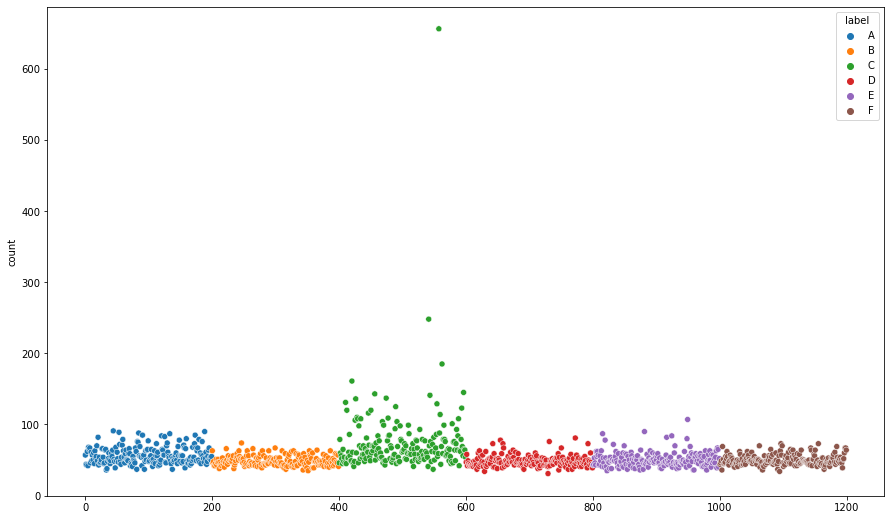

In [22]:
df['count'] = df['text'].apply(countWords)

plt.figure(figsize=(15,9))
sns.scatterplot(x =df.index, y = 'count', hue = 'label', data = df)


In [23]:
df.value_counts('label')

label
A    200
B    200
C    200
D    200
E    200
F    200
dtype: int64